In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount= True)

path_prefix = "./drive/My Drive/BIO310"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
fname = "data.csv"
df = pd.read_csv(join(path_prefix, fname))

In [ ]:
fname2 = "labels.csv"
df2= pd.read_csv(join(path_prefix,fname2))

In [ ]:
# 1. Generate predictions for clusters using k-means. 
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state=1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# 2.a) Use sklearn PCA with n components=2. What is the ratio of variance explained by the two components?
df = df.iloc[: , 1:] # delete first column because it describes patients
X = np.array(df)
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print("Variance ratio: ",pca.explained_variance_ratio_)

Variance ratio:  [0.1583855 0.1050396]


In [ ]:
# 2.b) Use sklearn tSNE with n components=2.
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(801, 2)

In [ ]:
# 3. Visualize k-means predictions together with true labels on the reduced dataset.
# a) Using the k-means algorithm from (1), get cluster number predictions for each patient.
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state=1)
kmeans.fit(X)
predictMatrix = kmeans.predict(X)
for i in range(len(df)):
  print("Cluster number prediction for patient {}: {}".format(i+1, predictMatrix[i]))

Cluster number prediction for patient 1: 0
Cluster number prediction for patient 2: 3
Cluster number prediction for patient 3: 0
Cluster number prediction for patient 4: 0
Cluster number prediction for patient 5: 1
Cluster number prediction for patient 6: 0
Cluster number prediction for patient 7: 2
Cluster number prediction for patient 8: 0
Cluster number prediction for patient 9: 1
Cluster number prediction for patient 10: 0
Cluster number prediction for patient 11: 1
Cluster number prediction for patient 12: 2
Cluster number prediction for patient 13: 0
Cluster number prediction for patient 14: 1
Cluster number prediction for patient 15: 1
Cluster number prediction for patient 16: 1
Cluster number prediction for patient 17: 3
Cluster number prediction for patient 18: 2
Cluster number prediction for patient 19: 2
Cluster number prediction for patient 20: 0
Cluster number prediction for patient 21: 1
Cluster number prediction for patient 22: 2
Cluster number prediction for patient 23:

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

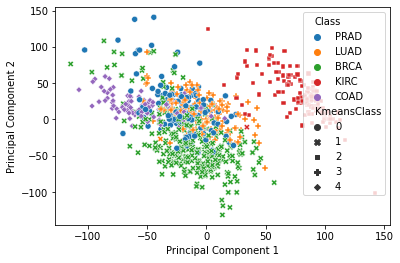

In [ ]:
# 3.b) Plot the results of PCA fit transform in a scatterplot. Show the predicted and true labels in the same scatterplot
kmeansData = KMeans(n_clusters=5, init= 'k-means++', random_state=1, n_init=5).fit_predict(df)
kmeansData = pd.Series(kmeansData, name='KmeansClass',index=df.index)
scaledData = StandardScaler().fit_transform(df) 
PrincipcalComponents = PCA(n_components=2).fit_transform(scaledData)
PrincipcalComponents = pd.DataFrame(PrincipcalComponents, columns=['Principal Component 1', 'Principal Component 2'], index= df.index)
finalPCA = pd.concat([PrincipcalComponents, df2, kmeansData], axis=1)
sns.scatterplot(data=finalPCA, x="Principal Component 1", y="Principal Component 2", hue="Class", style="KmeansClass")

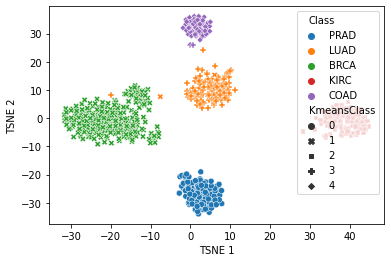

In [31]:
# 3.c) Plot the results of tSNE fit transform in a scatterplot
TSNEDimensions = TSNE(n_components=2).fit_transform(scaledData)
TSNEDimensions = pd.DataFrame(TSNEDimensions, columns=['TSNE 1', 'TSNE 2'], index= df.index)
finalTSNE = pd.concat([TSNEDimensions, df2, kmeansData], axis=1)
sns.scatterplot(data=finalTSNE, x="TSNE 1", y="TSNE 2", hue="Class", style="KmeansClass")

3.d) When we look at these plots, classification of type of cancer with tSNE can be observed. TSNE is more effective to reduce the dimensions since classes are labeled properly. But PCA causes overlapping.